In [1]:
#MEngimpor libray untuk stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #import Indonesian Stemmer
import re 
import csv
import pandas as pd
import numpy as np
import string
import nltk
import seaborn as sns

In [2]:
#Membuat fungsi load_data untuk membuka file csv hasil stopword
def load_data():
  data = pd.read_csv('D:/hasilSentimen2/Data-hasil-stopword.csv',encoding='ISO-8859-1')

  return data
     


In [3]:
#Memasukkan kedalam variabel tweet_df
tweet_df = load_data()
#Menampilkan 100 data teratas
tweet_df.head(100)

,Tweet,Sentimen
0,"['yang terhormat', 'kepala kepolisian republik...",Negatif
1,"['indahnya', 'toleransi', 'indonesia', 'cc', '...",Positif
2,"['tuan', 'presdent', 'panglima', 'tentara nasi...",Negatif
3,"['terima', 'kasih', 'kerja', 'keras', 'kekompa...",Positif
4,"['calon', 'kepala kepolisian republik indonesi...",Positif
...,...,...
95,"['reformasi', 'total', 'pekerjaan rumah', 'ber...",Negatif
96,"['kepala kepolisian republik indonesia', 'komu...",Negatif
97,"['hehe', 'lihat', 'laganya', 'cocok', 'kepala ...",Negatif
98,"['mari', 'umat', 'islam', 'doa', 'km50', 'dibu...",Positif


In [4]:
#Mengecek jumlah kolom dan tipedata 
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     144 non-null    object
 1   Sentimen  144 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [5]:
#STEMMING

#Membuat fungsi stemming untuk menghilangkan imbuhan dan kembali ke kata dasar
def stemmingIndo(Tweets):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(Tweets)

#Menggunakan fungsi ke kolom tweet
tweet_df['Tweet'] = tweet_df['Tweet'].apply(lambda x: stemmingIndo(x.lower()))
tweet_df.head(100)

,Tweet,Sentimen
0,yang hormat kepala polisi republik indonesia b...,Negatif
1,indah toleransi indonesia cc yang hormat menko...,Positif
2,tuan presdent panglima tentara nasional indone...,Negatif
3,terima kasih kerja keras kompak loyalitas bata...,Positif
4,calon kepala polisi republik indonesia ke depan,Positif
...,...,...
95,reformasi total kerja rumah berat kepala polis...,Negatif
96,kepala polisi republik indonesia komunis,Negatif
97,hehe lihat laga cocok kepala polisi republik i...,Negatif
98,mari umat islam doa km50 buka tabir buka fitna...,Positif


In [6]:
#Menyimpan hasil stemming
tweet_df.to_csv("D:/hasilSentimen2/Data-hasil-stemming.csv",encoding='utf-8',index=False)

In [7]:
#Mengimpor kembali hasil stemming
data6 = pd.read_csv('D:/hasilSentimen2/Data-hasil-stemming.csv',encoding='ISO-8859-1')
data6     

,Tweet,Sentimen
0,yang hormat kepala polisi republik indonesia b...,Negatif
1,indah toleransi indonesia cc yang hormat menko...,Positif
2,tuan presdent panglima tentara nasional indone...,Negatif
3,terima kasih kerja keras kompak loyalitas bata...,Positif
4,calon kepala polisi republik indonesia ke depan,Positif
...,...,...
139,yang hormat tolong rakyat tanah rampas masuk l...,Negatif
140,kepala polisi republik indonesia bantu mana la...,Positif
141,berani khianat polisi tentara nasional indones...,Negatif
142,mantap kepala polisi republik indonesia sigap ...,Positif


In [8]:
#Mengubah tipe data pada kolom sentimen menjadi category dan tweet menjadi string
data6 = data6.astype({'Sentimen' : 'category'})
data6 = data6.astype({'Tweet' : 'string'})
data6.dtypes

Tweet         string
Sentimen    category
dtype: object

In [9]:
#Menghitung kembali jumlah sentimen
data6["Sentimen"].value_counts()

Negatif    87
Positif    57
Name: Sentimen, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentimen', ylabel='count'>

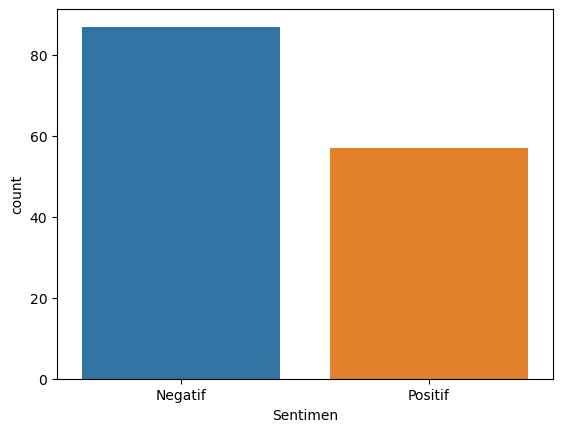

In [10]:
#Membuat barchart untuk jumlah sentimen
sns.countplot(data6["Sentimen"])

(-0.5, 399.5, 199.5, -0.5)

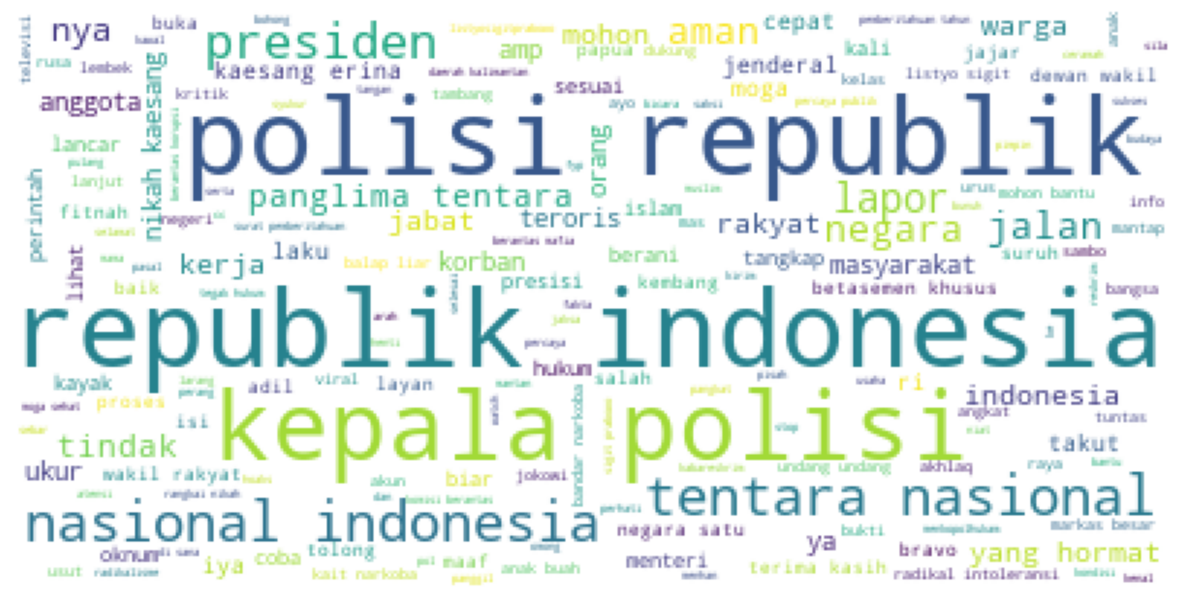

In [11]:
#Membuat wordcloud untuk kata yang sering muncul
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 10
str_tweets = ' '.join(data6['Tweet'].values)
wordcloud = WordCloud(background_color='white', max_words=1000).generate(str_tweets)
plt.imshow(wordcloud)
plt.axis('off')